# The Sparks Foundation Internship - TASK 3
# "Exploratory Data Analysis - Retail"
#### Author: Hamza Ahmed Ansari
#### Batch: September 2022¶
##### Problem:
* As a Business manager, try to find out the weak areas where you can work to make more process.

In [2]:
# Importing Libraries

# For Data structures:
import pandas as pd
import numpy as np

# For visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For warnings:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load dataset into Pandas Dataframe
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# How is our dataset structured?
df.shape

(9994, 13)

**Comment**: Our Dataset has 9994 entries(rows) and 13 columns

In [5]:
# Current numerical summary of the dataset
df[["Sales", "Quantity", "Discount", "Profit"]].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


### Checking for null values

In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


__Comment__: We have no inconsistency in the dataset so far

### Checking for duplicates and removing them

In [8]:
# Checking for duplicate values
df.duplicated().sum()

17

*Comment*: We have found 17 rows which are duplicated

In [9]:
# Dropping duplicate data but keep their first instances
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [10]:
# Now checking the duplicatte values
df.duplicated().sum()

0

__Comment__: We have successfully droped duplicate values

In [11]:
# How many unique values are there in each column?
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

__Comment__: Above result shows that how many unique values are there in each column. In case of categorical data, it is the number of how many categories are there in each column.

### Checking for Correlation using Heatmap

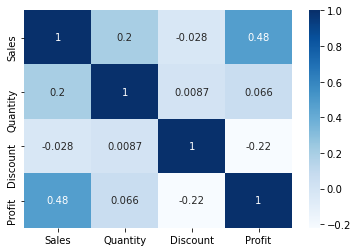

In [12]:
# Converting "Postal Code" to string datatype
df["Postal Code"] = df["Postal Code"].astype(str)

# Correlation matrix: Checking for correlation between fields
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

__Comment__: If we observe the correlation between numerical values the dataset has, we can see that neither "Discounts" nor "Quantity" has a strong relation with "Sales"

### Analysis of "Shipping Modes"

In [13]:
# Print all the categories available
for i in df['Ship Mode'].unique():
    print("-->", i)

--> Second Class
--> Standard Class
--> First Class
--> Same Day


Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

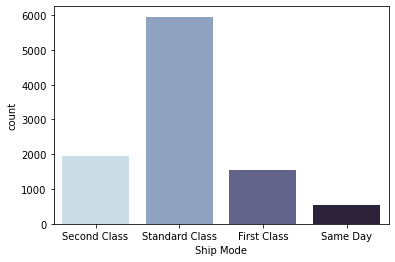

In [14]:
sns.countplot(x=df['Ship Mode'], palette="ch:s=.25,rot=-.25")
df["Ship Mode"].value_counts()

__Comment__: From the above results, we can conclude that shipping through Standard Class is in high demand.

Text(0, 0.5, 'Profit & Sales')

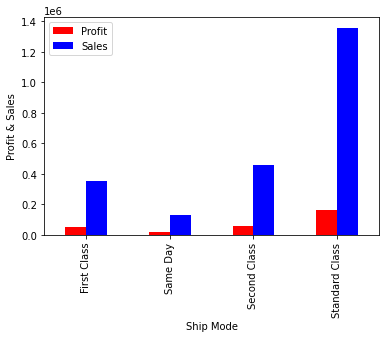

In [15]:
df.groupby('Ship Mode')[['Profit', 'Sales']].sum().plot.bar(color=['Red','Blue'])
plt.ylabel('Profit & Sales')

__Comment__: Highest Profit is gained through standard class which is high in demand

### Analysis of "Segments"

In [16]:
# Print all the categories available
for i in df['Segment'].unique():
    print("-->",i)

--> Consumer
--> Corporate
--> Home Office


Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

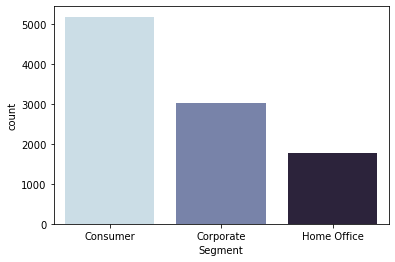

In [17]:
sns.countplot(x=df['Segment'], palette="ch:s=.25,rot=-.25")
df['Segment'].value_counts()

__Comment__: From the above results we can conclude that Consumers seem to have a large part of the market.

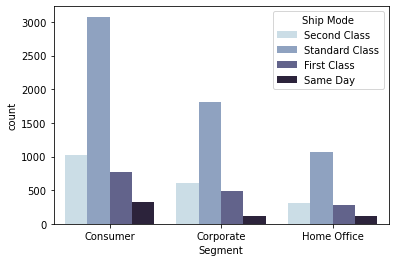

In [18]:
sns.countplot(x='Segment', hue='Ship Mode', data=df, palette="ch:s=.25,rot=-.25")
plt.show()

__Comment__: Consumers have a high sales record in each segment. Also Standard Class seems to be the most preferred mode of shipping.

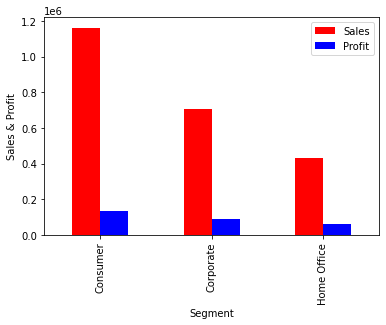

In [19]:
df.groupby('Segment')[['Sales', 'Profit']].sum().plot(kind='bar', color=['Red','Blue'])
plt.ylabel("Sales & Profit")
plt.show()

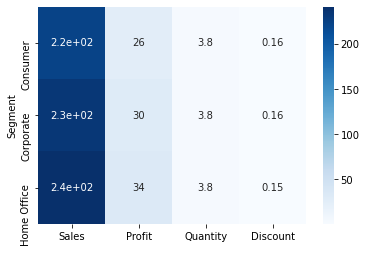

In [20]:
# Average Sales from each Segment 
seg = df.groupby('Segment')[['Sales','Profit','Quantity','Discount']].mean()
sns.heatmap(seg, annot=True, cmap='Blues')
plt.show()

__Comment__: Home office Appliances have a slightly higher Sales and Profit. Whereas, Quantity tends to remain same.

### Analysis of "Region"

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

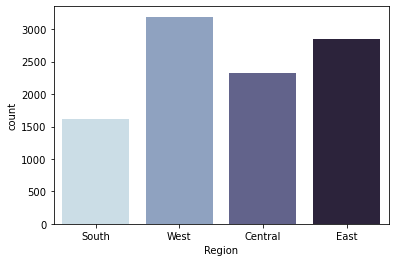

In [21]:
sns.countplot(x='Region', data=df, palette="ch:s=.25,rot=-.25")
df['Region'].value_counts()

__Comment__: Most Sales belongs to West region

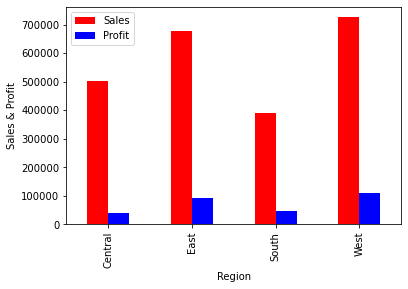

In [22]:
df.groupby('Region')[['Sales','Profit']].sum().plot(kind='bar', color=['Red','Blue'])
plt.ylabel('Sales & Profit')
plt.show()

__Comment__: East & West Regions are almost similar with a little difference.

### Analysis of "Categories" & "Sub-Categories"

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

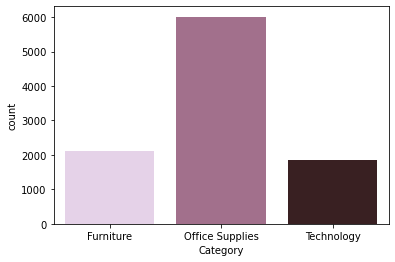

In [23]:
sns.countplot(x='Category', data=df, palette="ch:s=25,rot=-.25")
df['Category'].value_counts()

__Comment__: From the above results, we can conclude that Office Supplies have a high occuurence in our dataset, this could mean that it is in high demand.

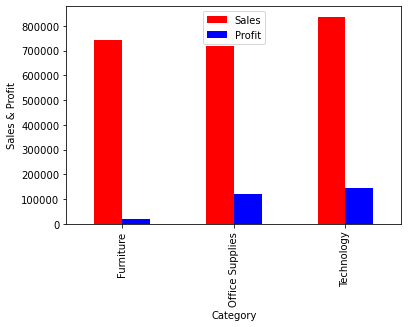

In [24]:
df.groupby('Category')[['Sales','Profit']].sum().plot(kind='bar', color=['Red', "Blue"])
plt.ylabel('Sales & Profit')
plt.show()

__Comment__: Technology seems to have a high demand. On the other hand, Office supplies and Furniture have approximately the same standings.

In [25]:
# Looking for Furniture popularity among regions
furn_reg = df[df['Category'] == 'Furniture']
furn_reg['Region'].value_counts()

West       706
East       600
Central    480
South      332
Name: Region, dtype: int64

In [26]:
# Looking for Office supplies popularity amoung regions
offsup_reg = df[df['Category'] == 'Office Supplies']
offsup_reg['Region'].value_counts()

West       1888
East       1710
Central    1419
South       995
Name: Region, dtype: int64

In [27]:
# Looking for Technology popularity amoung regions
tech_reg = df[df['Category'] == 'Technology']
tech_reg['Region'].value_counts()

West       599
East       535
Central    420
South      293
Name: Region, dtype: int64

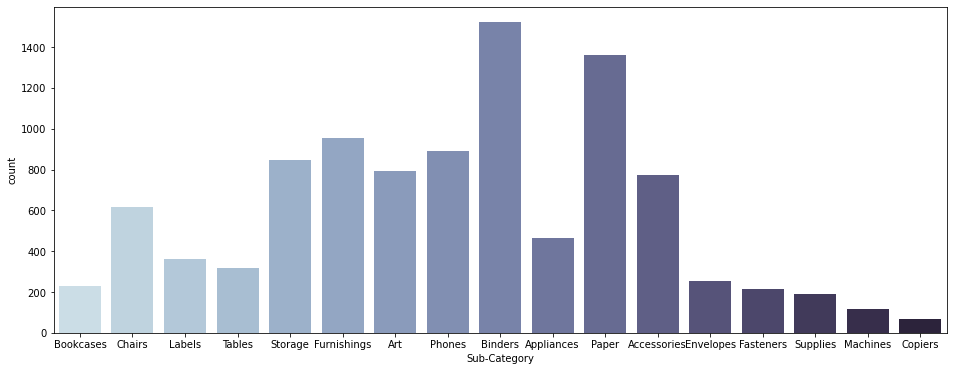

In [28]:
plt.figure(figsize=(16,6))
sns.countplot(x=df['Sub-Category'], palette="ch:s=.25,rot=-.25")
plt.show()

__Comment__: Binders and papers seems to have high occurencesin our sample dataset. They both might be related.

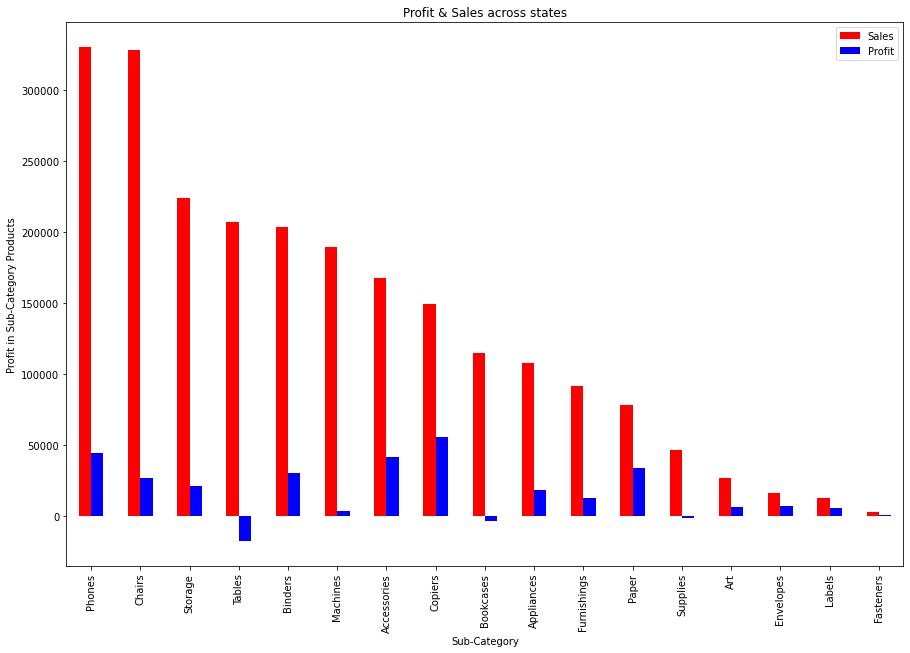

In [29]:
ps = df.groupby("Sub-Category")[['Sales','Profit']].sum().sort_values(by='Sales', ascending=False)
ps.plot(kind='bar', figsize=(15,10), color=['Red','Blue'])
plt.title('Profit & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit in Sub-Category Products')
plt.show()

__Comment__: Copiers, Accessories, Phones, Papers and Binders seems to have a reasonable sale.

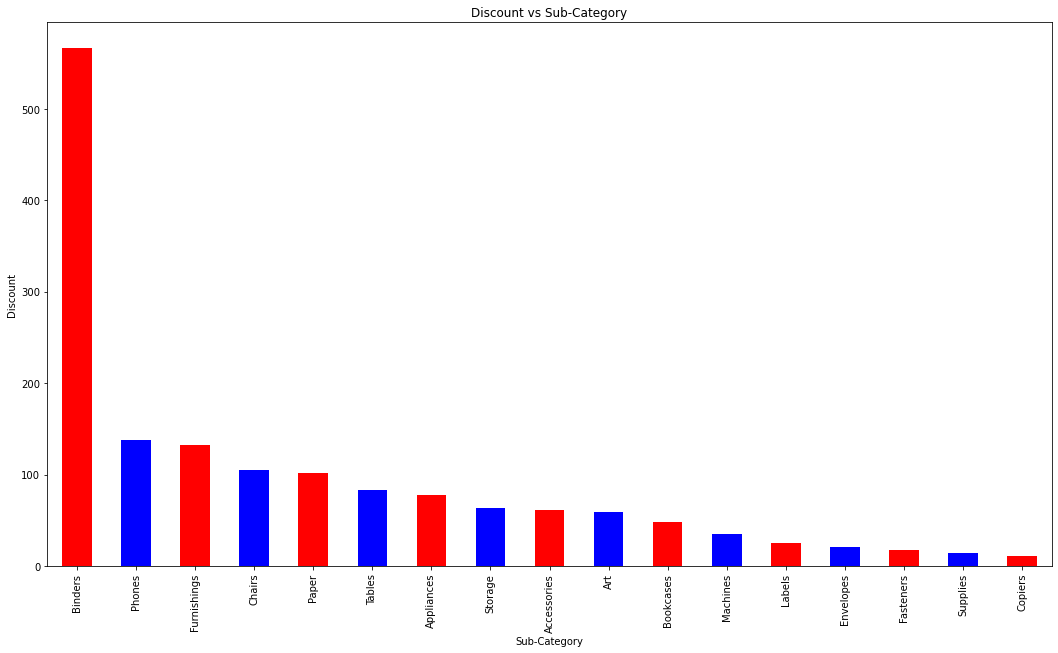

In [30]:
# GroupbySub & Discount
ps = df.groupby('Sub-Category')['Discount'].sum().sort_values(ascending=False)
ps.plot(kind='bar', figsize=(18,10), color=['Red','Blue'])
plt.title('Discount vs Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Discount')
plt.show()

__Comment__: We gave a huge discount on Binders while it was our one of the best source of income.

### Analysis of State-wise dealings

In [31]:
# Total number of unique states included in our dataset
print("Total number of states", len(df['State'].unique()))

Total number of states 49


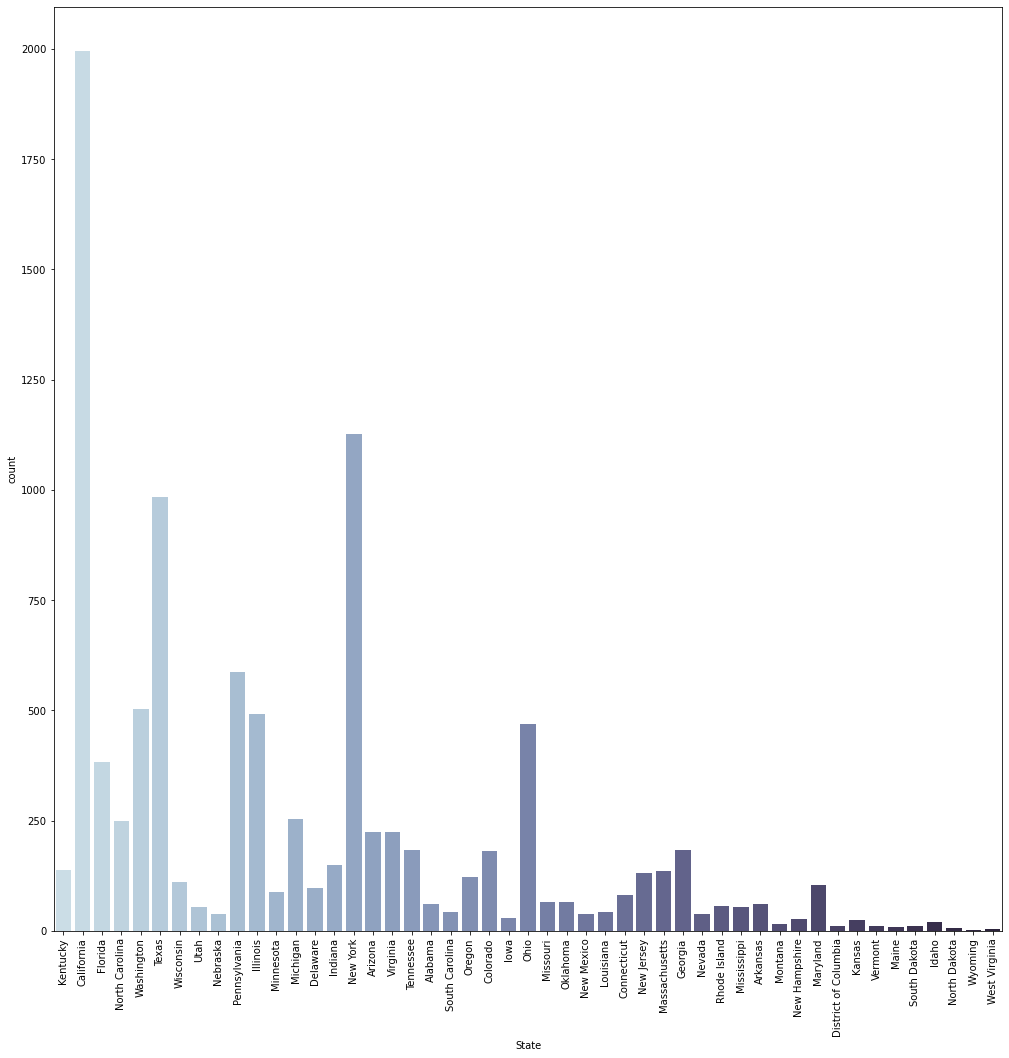

In [32]:
plt.figure(figsize=(17,17))
sns.countplot(x=df['State'], palette="ch:s=.25,rot=-.25")
plt.xticks(rotation=90)
plt.show()

__Comment__: California has the highest occurence. Texas and New York comes second to it. While Wyoming , West Virginia, North Dakota, Idaho, South Dakota, Maine, Vermont, Kansas, District of Columbia, New Hamshire, Mopntana have the lowest.

MAX Profit is found to be:  204.08893636363638  $
Min Profit/Loss is found to be:  -36.237858547008585  $


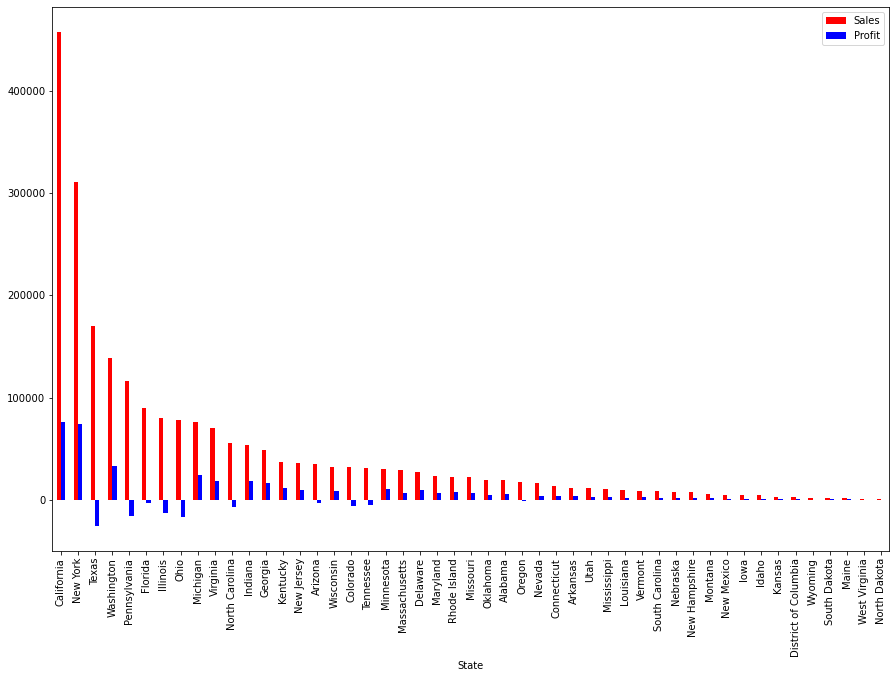

In [40]:
sample = df.groupby(['State'])[['Profit']].mean()
print("MAX Profit is found to be: ",max(sample['Profit'])," $")
print("Min Profit/Loss is found to be: ",min(sample['Profit'])," $")
ps = df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales', ascending=False)
ps.plot(kind='bar', figsize=(15,10), color=['Red','Blue'])
plt.xticks(rotation=90)
plt.show()

__Comment__: Highest average Profit count belongs to California and New York, while the highest loss count belongs to Texas(Quite simillar to North Pennsylvinia).

### Analysis of Sales-Profit Ratio

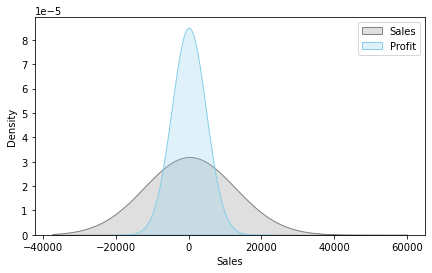

In [41]:
# KDE PLot
plt.figure(figsize=(7,4))
sns.kdeplot(df['Sales'], color='Gray', label='Sales', shade=True, bw_method=20)
sns.kdeplot(df['Profit'], color='Skyblue', label='Profit', shade=True, bw_method=20)
plt.legend()
plt.show()

### Analysis of Discount vs Profit

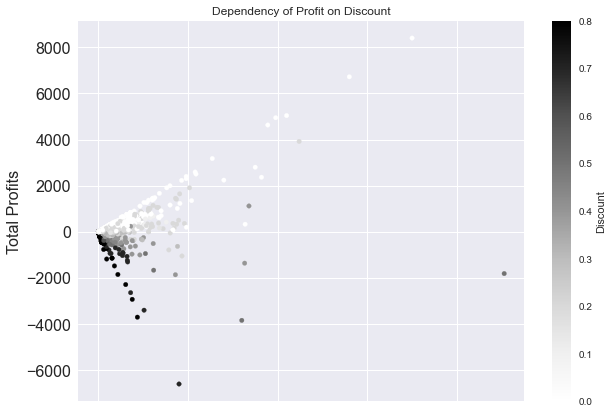

In [48]:
# Dependency of Profit on Discount
plt.style.use('seaborn')
df.plot(kind='scatter', figsize=(10,7), x='Sales', y='Profit', 
                                        c='Discount', s=20, fontsize=16)
plt.title('Dependency of Profit on Discount')
plt.ylabel('Total Profits', fontsize=16)
plt.show()

__Comment__: The above result shows a general scenerio that as our Discount increase, our Profit decreases.

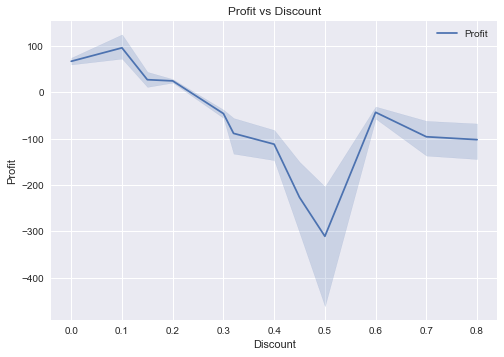

In [49]:
# Profit vs Discount
sns.lineplot(x='Discount', y='Profit', label='Profit', data=df)
plt.title('Profit vs Discount')
plt.legend()
plt.show()

__Comment__: Discounts from 0-50% decrease our Profits and are not doing anything worthwhile. Whereas if the discount is more than 50% we observe an increase in the Profit. Perhaps additional samples of this dastaset are required.

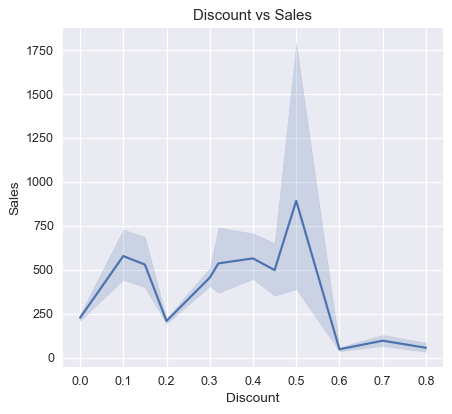

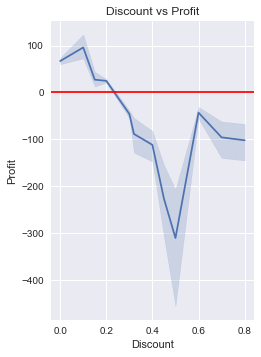

In [51]:
# Lets visualize effect of discount on sales and Profit
plt.figure(figsize=(12,5), dpi=90)

plt.subplot(1,2,1)
sns.lineplot(data=df, x='Discount', y='Sales')
plt.title('Discount vs Sales')
plt.show()

plt.subplot(1,2,2)
sns.lineplot(data=df, x='Discount', y='Profit')
plt.title('Discount vs Profit')
plt.axhline(y=0, color='red')
plt.show()

__Comment__: This is a general scenerio that tells us that as Discounts are increased our Sales increaseas as well, but the Profit we gain from that is not considerable. This scenerio is applicable on for discounts from 0-50%.

From 50% above discounts, our previous scenerio is reversed, and we observe that Sales decreased and Profit increased. Again this does not cover the loss we initially incurred,

Discounts of 60% look like they are popular but are have a bad average sales and profit. On the other hand, if we look at discounts ranging from 0-20%, they have some good profits. Therefore, 0-20% discounts should be our threshould.

### Discount vs Profit/Sales W.R.T Consumer Segments

In [54]:
# Collecting all data related to "Consumer"
con_prod = df[df['Segment'] == 'Consumer']
con_prod

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


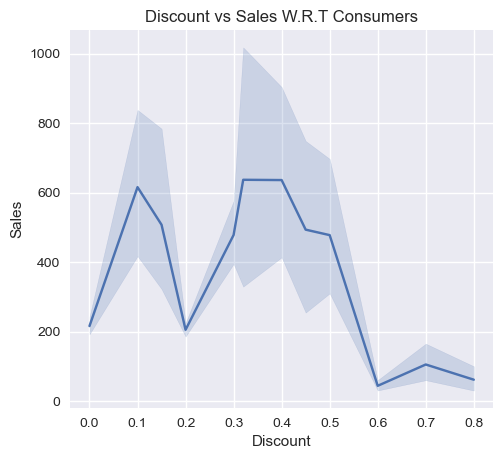

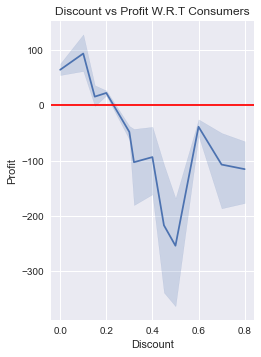

In [55]:
# Visualizing the effects of discount on Sales and Profit
plt.figure(figsize=(12,5), dpi=100)

plt.subplot(1,2,1)
sns.lineplot(data=con_prod, x='Discount', y='Sales')
plt.title('Discount vs Sales W.R.T Consumers')
plt.show()

plt.subplot(1,2,2)
sns.lineplot(data=con_prod, x='Discount', y='Profit')
plt.title('Discount vs Profit W.R.T Consumers')
plt.axhline(y=0, color='red')
plt.show()

__Comment__: Here 0-100% discounts show a significant increase in Sales and Profit with manageable variance.

10-20% Discounts show steep fall in the profits, but is still manageablefor the most part, as it does not drop below the "0" marker.

Other options cannot be considered as feasible.

### Discount vs Profit/Sales W.R.T Corporate Segments

In [56]:
# Collecting all data related to "Corporate"
cor_prod = df[df['Segment'] == 'Corporate']
cor_prod

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
21,Standard Class,Corporate,United States,Fremont,Nebraska,68025,Central,Office Supplies,Art,19.460,7,0.0,5.0596
22,Standard Class,Corporate,United States,Fremont,Nebraska,68025,Central,Office Supplies,Appliances,60.340,7,0.0,15.6884
35,First Class,Corporate,United States,Richardson,Texas,75080,Central,Technology,Phones,1097.544,7,0.2,123.4737
36,First Class,Corporate,United States,Richardson,Texas,75080,Central,Furniture,Furnishings,190.920,5,0.6,-147.9630
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,Second Class,Corporate,United States,Newark,Delaware,19711,East,Furniture,Furnishings,13.400,1,0.0,6.4320
9965,Second Class,Corporate,United States,Newark,Delaware,19711,East,Office Supplies,Paper,4.980,1,0.0,2.3406
9966,Second Class,Corporate,United States,Newark,Delaware,19711,East,Office Supplies,Envelopes,109.690,7,0.0,51.5543
9987,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Accessories,79.990,1,0.0,28.7964


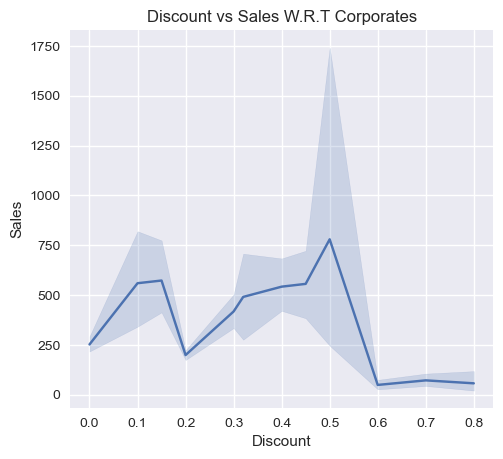

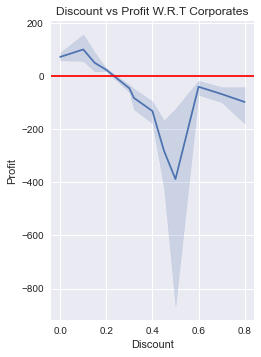

In [57]:
# Visualizing the effects of discount on Sales and Profit
plt.figure(figsize=(12,5), dpi=100)

plt.subplot(1,2,1)
sns.lineplot(data=cor_prod, x='Discount', y='Sales')
plt.title('Discount vs Sales W.R.T Corporates')
plt.show()

plt.subplot(1,2,2)
sns.lineplot(data=cor_prod, x='Discount', y='Profit')
plt.title('Discount vs Profit W.R.T Corporates')
plt.axhline(y=0, color='red')

__Comment__: Again we observe that only discounts which are ranging between 0-20% are bringing positive and responsible profits.

15% Discounts seems to have good sales and reasonable profit overall.

### Discount vs Profit/Sales W.R.T Home Office Segments

In [58]:
# Collecting all data related to "Home Office"
home_prod = df[df['Segment'] == 'Home Office']
home_prod

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
34,Second Class,Home Office,United States,Houston,Texas,77095,Central,Office Supplies,Paper,29.4720,3,0.20,9.9468
37,Standard Class,Home Office,United States,Houston,Texas,77041,Central,Office Supplies,Envelopes,113.3280,9,0.20,35.4150
38,Standard Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,Bookcases,532.3992,3,0.32,-46.9764
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Office Supplies,Paper,13.3600,2,0.00,6.4128
9976,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Technology,Phones,249.5840,2,0.20,31.1980
9977,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Office Supplies,Fasteners,13.8600,7,0.00,0.0000
9978,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Office Supplies,Binders,13.3760,4,0.20,4.6816


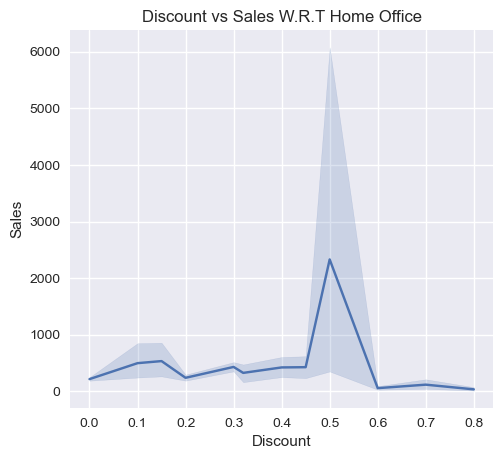

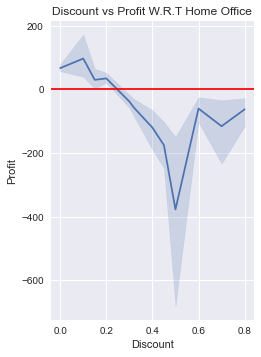

In [59]:
# Visualizing the effects of discount on Sales and Profit
plt.figure(figsize=(12,5), dpi=100)

plt.subplot(1,2,1)
sns.lineplot(data=home_prod, x='Discount', y='Sales')
plt.title('Discount vs Sales W.R.T Home Office')
plt.show()

plt.subplot(1,2,2)
sns.lineplot(data=home_prod, x='Discount', y='Profit')
plt.title('Discount vs Profit W.R.T Home Office')
plt.axhline(y=0, color='red')
plt.show()

__Comment__: Again 0-25% are bringing profits, with 10% being the highest profit magnet

## Descriptive Summary

1) No given fields seem to have any strong Correlation with Profits we are making. It may be assumed that there is another factor at work which is highly correlated to this.

2) Standard Class is a most popular package among our customers and generates the most profit. We should re-design this package, in order have the best possible grasp of this opportunity.

3) Huge mass of our customer base belongs to Consumer Segment (with 5182 orders). New offers should be devised to engage them better(better recommender systems might be needed). These offers should be applicable on Shipping modes and pricing schemes both.

4) (continuation of point 3) Runner up to the above is our Corporate Segment (with 3014 orders). As they usually buy in bulk we could come up with more offers suitable for their business needs. These offers should be applicable on Shipping modes and pricing schemes both.

5) (continuation of point 4) As for Home Office Segment(with least sales), we could target industries which are popular among them(as an starting act). Then we will focus on accumulating products on our shelves which relate to their needs.

6) West and East have a high customer base. As for Central, we might improve our marketting strategies over there. We might be getting a tough competition in the South. In any case, we should focus on what is causing this minimized customer reach over there.

7) Although Office Supplies(category) have the most order count, but it has the least sales. This could be a problem of our pricing models or product accumulation customs.

8) Furniture(category) needs more attention as it profits are at the minimum. We should look more into their marketting promotions and areas in which they have a market.

9) Connecting the above (point 8), overall south region region needs more attention with respect to customer needs and satisfaction.

10) Sales have higher std.deviation and profits have relatively less (roughly 1/3 of sales). We are getting about 60-70% profit from our total sales. This might mean that we are unable to obtain profits from about 30-40% of our Sales. This is a bad case for our Superstore.

11) Feasible values for Discounts are found to be 0-20%. Any more than that results in loss according to our current pricing schemes. Optimum Discount values range from 10-15%.

12) Sales have the highest correlation with Profit among other fields, which is ~48. This is not a strong relation, which suggests that increase in sales does not(for the most part) increase our profits. Pricing scheme or packages such as shipping modes etc may be the issue.

# TASK 3 Completed!